## benchmarking

This script is used to compare the pmcpy results with [urban_plume_process.F90](../src/urban_plume_process.F90)

In [1]:
# import necessary package
import pmcpy
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# define the path to data
p = "../data/"

**results from `pmcpy`**

In [2]:
# define a dictionary to save the results
d = {"tot_num_conc": [], "tot_mass_conc":[], 
     "chi":[], "d_alpha":[], "d_gamma":[],
     "chi_a":[], "d_alpha_a":[], "d_gamma_a":[]}

# define the surrogate groups for mixing state calculation
group_list = [["OC","BC"],
              ["API1","API2","LIM1","LIM2"],
              ["SO4","NO3","NH4"]]

# loop across scenarios using pmcpy
for i in range(1,26):
    pmc = pmcpy.load_pmc(p+"/urban_plume_0001_000000"+str(i).zfill(2)+".nc")
    d["tot_num_conc"].append(pmc.get_num_conc())
    d["tot_mass_conc"].append(pmc.get_mass_conc(dry=False))
    
    # calculate mixing state for grouped species with water
    D_alpha, D_gamma, chi = pmc.get_mixing_state_index(group_list, diversity=True)
    d["d_alpha"].append(D_alpha)
    d["d_gamma"].append(D_gamma)
    d["chi"].append(chi)
    
    # calculate mixing state for all species (without water)
    D_alpha_a, D_gamma_a, chi_a = pmc.get_mixing_state_index(drop_list=["H2O"], diversity=True)
    d["d_alpha_a"].append(D_alpha_a)
    d["d_gamma_a"].append(D_gamma_a)
    d["chi_a"].append(chi_a)

**compare the results from Fortran postprocessing `urban_plume_process.F90`**

###### tot_num_conc ######


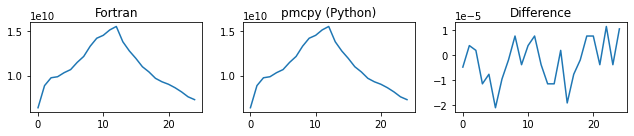

###### tot_mass_conc ######


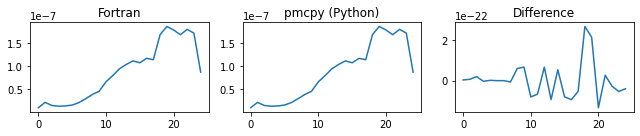

###### chi ######


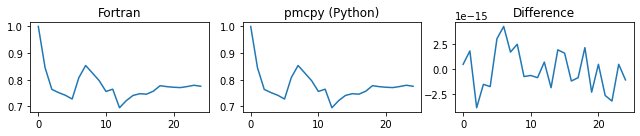

###### d_alpha ######


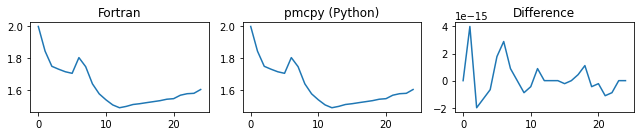

###### d_gamma ######


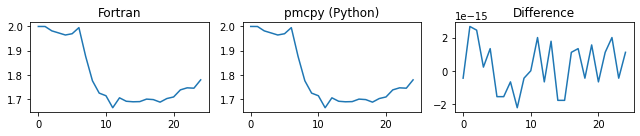

###### chi_a ######


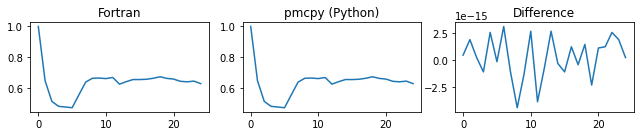

###### d_alpha_a ######


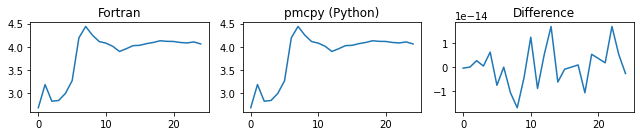

###### d_gamma_a ######


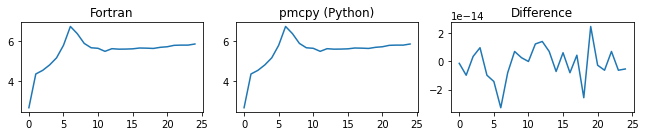

In [3]:
ds_b = xr.open_dataset(p+"urban_plume_process.nc")

# ======= comparison =======
for k in d:
    
    print("######",k,"######")
    fig = plt.figure(figsize=(9,2))
    ax1 = fig.add_subplot(131)
    pd.Series(ds_b[k].values).plot(ax=ax1)
    ax1.set_title("Fortran")

    ax2 = fig.add_subplot(132)
    pd.Series(d[k]).plot(ax=ax2)
    ax2.set_title("pmcpy (Python)")

    ax3 = fig.add_subplot(133)
    pd.Series(ds_b[k].values-np.array(d[k])).plot(ax=ax3)
    ax3.set_title("Difference")
    
    plt.tight_layout()
    plt.show()